# クラスタリング

- 茨城県の場合は、50個〜70個のグループに分けるのが良さそう。ここでは60個に分ける
- それぞれのグループで、最も医師数が多い病院を代表病院として選ぶ
- K-means法とWard法を実施

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'IPAGothic'

prefecture = 'ibaraki'
n_clusters = 60

In [2]:
df = pd.read_excel('dataset/'+prefecture+'/hospitals_'+prefecture+'.xlsx', index_col=0)
df.head()

,name,postal_code,latitude,longitude,num_doctors
0,水戸赤十字病院,310-0011,36.375394,140.477223,8
3,茨城県立こども病院,311-4145,36.391321,140.398241,1
4,住吉クリニック病院,310-0844,36.334245,140.474689,4
5,公益財団法人報恩会石崎病院附属緑町\nクリニック,310-0034,36.380680,140.454201,1
6,医療法人社団向陽会水戸クリニック,310-0015,36.370621,140.476916,1


In [3]:
X = df[['latitude','longitude']].to_numpy()

## k-means

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
labels = kmeans.labels_

In [5]:
df['kmeans_label'] = [str(label) for label in labels]

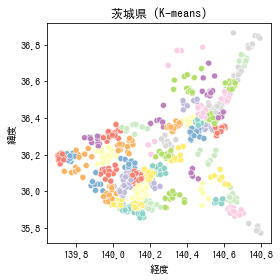

In [6]:
plt.figure(figsize=(4,4))

sns.scatterplot(data=df, y="latitude", x="longitude", hue="kmeans_label", palette="Set3", legend=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('茨城県 (K-means)')
plt.xlabel('経度')
plt.ylabel('緯度')

plt.tight_layout()
plt.savefig('results/'+prefecture+'/kemans_'+prefecture+'_'+str(n_clusters)+'.pdf')

## Ward algorithm

In [7]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
labels = clustering.labels_
df['Ward_label'] = [str(label) for label in labels]

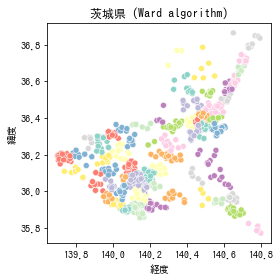

In [8]:
plt.figure(figsize=(4, 4))

sns.scatterplot(data=df, y="latitude", x="longitude", hue="Ward_label", palette="Set3", legend=False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('茨城県 (Ward algorithm)')
plt.xlabel('経度')
plt.ylabel('緯度')
plt.tight_layout()
plt.savefig('results/'+prefecture+'/'+prefecture+'_Ward_'+str(n_clusters)+'.pdf')

In [9]:
df_hospitals_merged = pd.DataFrame( columns=['name','postal_code','latitude','longitude','num_doctors'] )

num_doctors_accumulated = []
for i, df_part in df.groupby(['Ward_label']):
    num_doctors_accumulated.append(df_part['num_doctors'].sum())
    tmp_se = df_part[df_part['num_doctors']==df_part['num_doctors'].max()][0:1]
    df_hospitals_merged = df_hospitals_merged.append( tmp_se, ignore_index=True )

df_hospitals_merged['num_doctors_accumulated'] = num_doctors_accumulated
df_hospitals_merged.to_excel('results/'+prefecture+'/Top-'+str(n_clusters)+'_hospitals_in_'+prefecture+'.xlsx')
df_hospitals_merged.head()


,name,postal_code,latitude,longitude,num_doctors,kmeans_label,Ward_label,num_doctors_accumulated
0,医療法人 鴻仁会上の原病院,309-1226,36.348503,140.046360,6,48,0,28
1,医療法人 聖和会つくば病院,311-3433,36.165993,140.315645,5,58,1,74
2,大森医院,311-0502,36.786941,140.483199,2,26,10,8
3,土浦厚生病院,300-0064,36.108556,140.207839,7,56,11,102
4,社会福祉法人白十字会 白十字総合病院,314-0134,35.901551,140.619479,9,35,12,53


### Number of doctors

In [10]:
# df.groupby(['kmeans_label']).sum()['num_doctors']

### standard deviation of the merged area

In [11]:
# df_std = df_.groupby(['kmeans_label']).std()
# district_std = [max(row['latitude'], row['longitude']) for idx,row in df_std.iterrows()]
# district_std

### Mean distance

In [12]:
# df_density = pd.read_excel('dataset/'+prefecture+'/human_density_'+prefecture+'.xlsx', index_col=0)
# df_density.head()

In [13]:
# def min_distance(Y_CODE, X_CODE):
#     d_min = 1000000
#     for i, row in df_hospitals_merged.iterrows():
#         y = row['latitude']
#         x = row['longitude']
#         distance = np.sqrt((Y_CODE-y)**2 + (X_CODE-x)**2)
#         if distance < d_min:
#             d_min = distance
#     return d_min

# mean_distance = 0
# for i, row in df_density.iterrows():
#     mean_distance += row['POP_DENSITY']*min_distance(row['Y_CODE'], row['X_CODE'])
    
# mean_distance = mean_distance/df_density['POP_DENSITY'].sum()